Kiet Nguyen

ID: 001601720

Email: kngu179@wgu.edu

**A. Question**

*1. Relevant Question.*

Is there a difference between the mean monthly charge of customers who disconnected service in the past month (churn customers) and current customers?

> Two-sample t-test Hypothesis Test:
>
> H0: x1 = x2
>
> H1: x1 ≠ x2
>
> x1: Churn sample mean
>
> x2: Current sample mean
>
> alpha = 0.05

Before conducting the two-sample t-test, we need to satisfy the following assumptions (Hayden, 2022):

1. Samples are independent and randomly sampled
2. Each sample is normally distributed
3. Variances of both samples are approximately equal

*2. Stakeholders Benefit.*

The stakeholders can benefit from this analysis, because it allows the company to reduce expenses and generate higher profit. Since acquiring new customers is significantly more expensive than retaining current customers. By knowing whether monthly charge had an effect on churn, stakeholders can implement marketing campaigns and offer incentives to reduce service costs. Salespeople and customer service representatives can also offer promotional rates to keep high risk customers from leaving.

*3. Necessary Data*

The dependent variable is `Churn`, a categorical variable with a binary value of Yes or No. `MonthlyCharge` is the independent variable that will be used for the two-sample t-test. Additionally, two continuous and two categorical variables will be explored to gain insight on the churn rate. The two continuous variables are `Age` and `Income`, and the two categorical variables are `Area` and `Contract`.

**B. Analysis**

*1. Python Code*

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

# Figure size option for seaborn
# Code adapted from Delft Stack (Narula, 2021):
# https://www.delftstack.com/howto/seaborn/size-of-seaborn-plot/
sns.set(rc={'figure.figsize': (16, 8)})

# Import and create a copy of the data
clean_csv = pd.read_csv('churn_clean.csv')
data = clean_csv.copy(deep=True)

In [3]:
# Separate data into the churn and current groups to satisfy independent assumption
# This makes sure both groups are not connected to each other
churn_group = data[data['Churn'] == 'Yes']
current_group = data[data['Churn'] == 'No']

# Group sizes
churn_size = len(churn_group)
current_size = len(current_group)
print(f'Churn Group Size: {churn_size} - {churn_size / 100}%')
print(f'Current Group Size: {current_size} - {current_size / 100}%')

# Take 2000 random samples from each group with a random seed to satisfy random sampling assumption
# Code adapted from DataCamp (Matsui, 2022):
# https://app.datacamp.com/learn/courses/introduction-to-statistics-in-python
churn_sample = churn_group.sample(n=2000, random_state=123)
current_sample = current_group.sample(n=2000, random_state=123)

Churn Group Size: 2650 - 26.5%
Current Group Size: 7350 - 73.5%


In [4]:
# Basic statistics on monthly charge of sample churn group
churn_sample['MonthlyCharge'].describe()

count    2000.000000
mean      200.935307
std        41.602373
min        91.448900
25%       170.165644
50%       200.679850
75%       233.638975
max       315.878600
Name: MonthlyCharge, dtype: float64

In [5]:
# Basic statistics on monthly charge of sample current group
current_sample['MonthlyCharge'].describe()

count    2000.000000
mean      163.791871
std        40.144094
min        77.505230
25%       134.349600
50%       160.306750
75%       187.265800
max       297.315800
Name: MonthlyCharge, dtype: float64

<AxesSubplot:title={'center':'Current Sample'}, xlabel='MonthlyCharge', ylabel='Customers'>

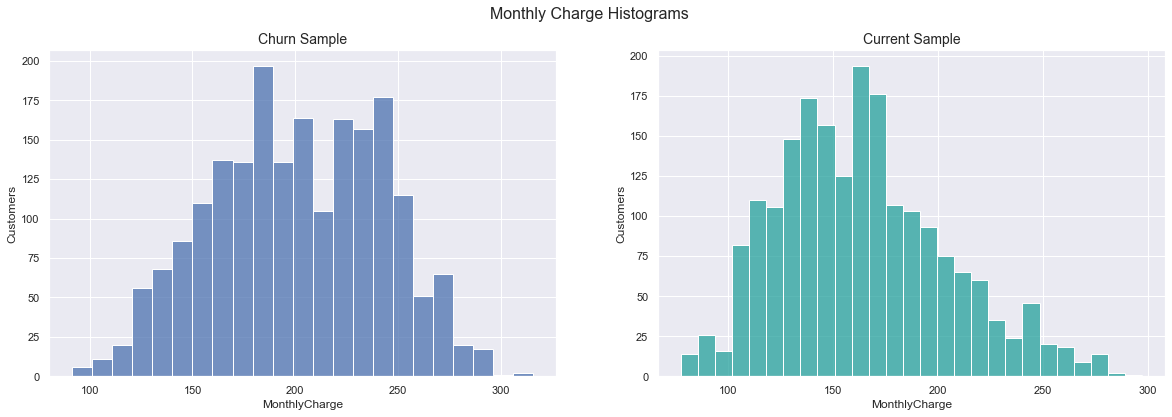

In [6]:
# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
fig.suptitle('Monthly Charge Histograms', size=16)

# Plot sample distribution for monthly charge
# Code adapted from seaborn documentation (Waskom, 2021b):
# https://seaborn.pydata.org/generated/seaborn.histplot.html
axes[0].set_title('Churn Sample', size=14)
axes[0].set_ylabel('Customers')
sns.histplot(ax=axes[0], data=churn_sample['MonthlyCharge'])

axes[1].set_title('Current Sample', size=14)
axes[1].set_ylabel('Customers')
sns.histplot(ax=axes[1], data=current_sample['MonthlyCharge'], color='#24A19C')

Text(0.5, 1.0, 'Current Sample')

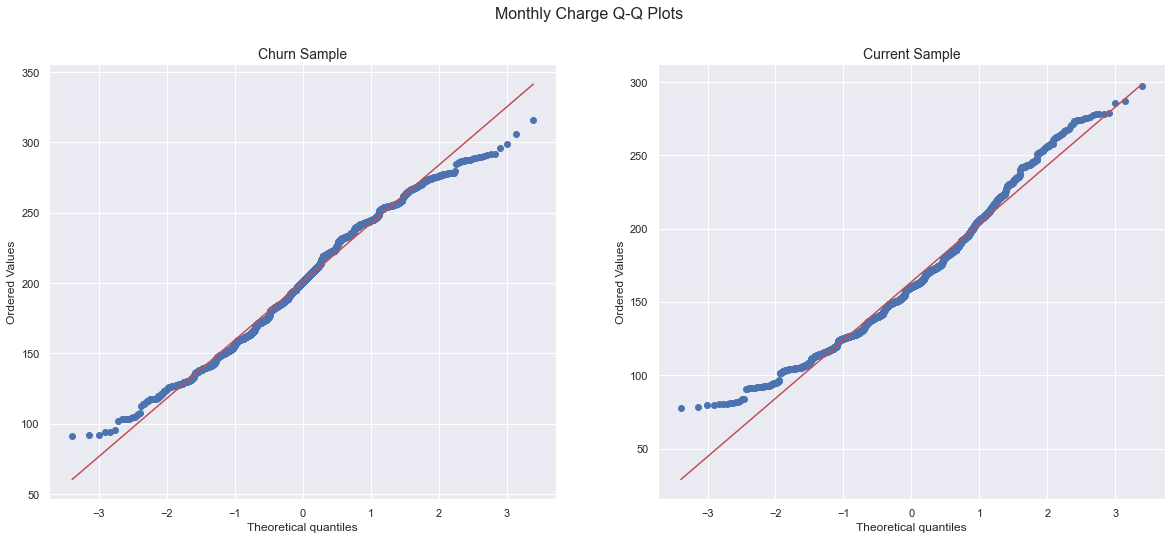

In [7]:
# Set up subplots
fig = plt.figure(figsize=(20, 8))
fig.suptitle('Monthly Charge Q-Q Plots', size=16)

# Verify normality assumption with Q-Q plots
# Adapted from scipy documentation (Oliphant, 2021):
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html
ax1 = plt.subplot(121)
res1 = stats.probplot(churn_sample['MonthlyCharge'], plot=plt)
plt.title('Churn Sample', size=14)

ax2 = plt.subplot(122)
res2 = stats.probplot(current_sample['MonthlyCharge'], plot=plt)
plt.title('Current Sample', size=14)

In [8]:
# Calculate variances of both groups
churn_var = churn_sample['MonthlyCharge'].var()
current_var = current_sample['MonthlyCharge'].var()

# Calculate the variance ratio between churn and current group
# Rule of thumb ratio (Ford, 2013):
# https://data.library.virginia.edu/a-rule-of-thumb-for-unequal-variances/
ratio = churn_var / current_var

# Check if both groups have equal variance
var_df = pd.DataFrame(data={'Churn Group': f'{churn_var:.3f}',
                            'Current Group': f'{current_var:.3f}',
                            'Ratio ': f'{ratio:.2f}'},
                      index=['Monthly Charge Variance'])
var_df

,Churn Group,Current Group,Ratio
Monthly Charge Variance,1730.757,1611.548,1.07


*2. Analysis Results*

In [9]:
# Create two arrays
churn_array = np.array(churn_sample['MonthlyCharge'])
current_array = np.array(current_sample['MonthlyCharge'])

# Perform two-sample t-test
# Adapted from DataCamp (Hayden, 2022):
# https://app.datacamp.com/learn/courses/experimental-design-in-python
t_result = stats.ttest_ind(churn_array, current_array)
print('Result of two-sample t-test:')
print(f'- t-statistic = {t_result[0]}')
print(f'- p-value = {t_result[1]}')

Result of two-sample t-test:
- t-statistic = 28.73253801199318
- p-value = 3.2789749353153525e-165


*3. Technique Justification.*

After conducting the Principal Component Analysis, I identified `MonthlyCharge` as a principal component that explained a large amount of variance in `Churn`. Since only 26.5% of the customers were churn customers, I split the churn and current customers into their respective groups. Using the `describe()` method, the churn group showed a higher mean `MonthlyCharge` than the current group. At the same time, it's possible that this difference could've happened by chance. A hypothesis test was needed to make sure that there is a real difference between each group.

Among the three tests, the two-sampe t-test compares the means between two continuous samples. It returns a p-value that can tell me whether the difference between the samples is statistically significant (Hayden, 2022). This is the hypothesis test that best answers my question. The Chi-Square test was not appropriate to answer my question because it only determines whether there is an association between two categorical variables (Kent State University Libraries, 2022). `MonthlyCharge` is a continuous variable and will not work with the Chi-Square test. The ANOVA test is a generalization of the t-test to three or more independent variables (Hayden, 2022). I only want to compare two groups so the ANOVA test is more than what my question needs.

**C. Univariate Statistics**

*1. Visual Findings*

<AxesSubplot:title={'center':'Income'}, xlabel='Income', ylabel='Customers'>

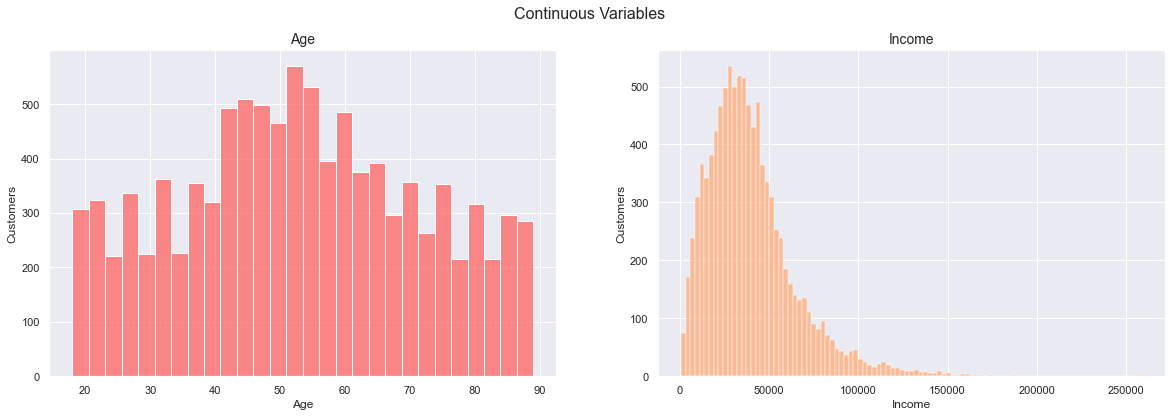

In [10]:
# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
fig.suptitle('Continuous Variables', size=16)

# Age histogram
axes[0].set_title('Age', size=14)
axes[0].set_ylabel('Customers')
sns.histplot(ax=axes[0], data=data['Age'], color='#FF6363')

# Income histogram
axes[1].set_title('Income', size=14)
axes[1].set_ylabel('Customers')
sns.histplot(ax=axes[1], data=data['Income'], color='#FFAB76')

<AxesSubplot:title={'center':'Contract'}, ylabel='Customers'>

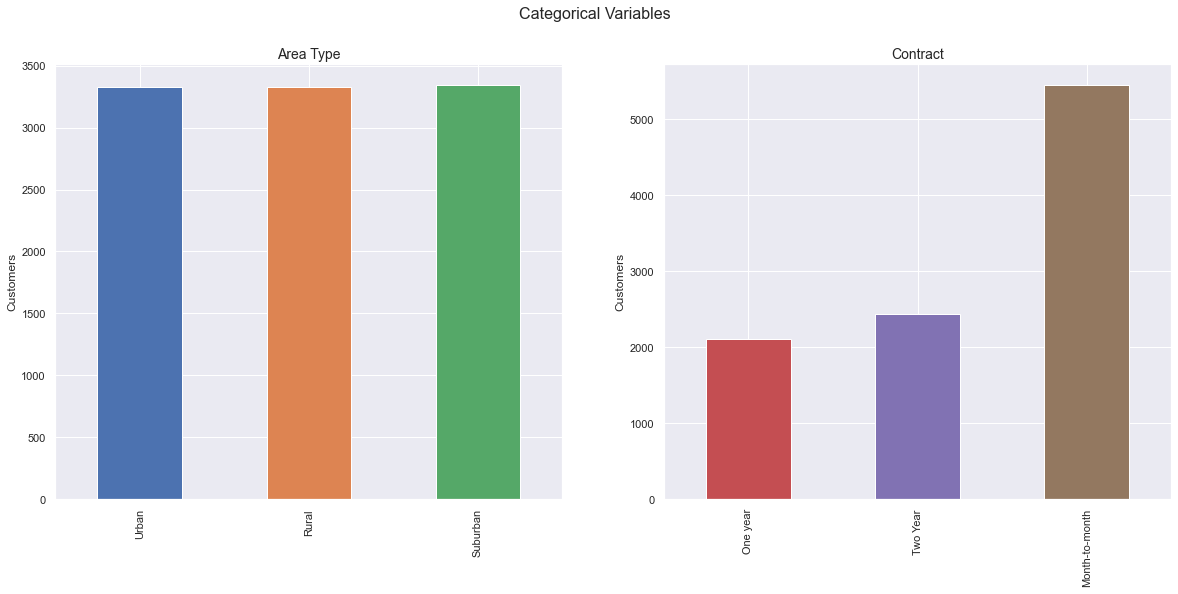

In [11]:
# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle('Categorical Variables', size=16)

palette = sns.color_palette()

# Area type bar chart
# Adapted from pandas documentation (McKinney, 2022):
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
axes[0].set_title('Area Type', size=14)
axes[0].set_ylabel('Customers')
area = data['Area'].value_counts().sort_values()
area.plot.bar(ax=axes[0], color=palette)

# Contract term bar chart
axes[1].set_title('Contract', size=14)
axes[1].set_ylabel('Customers')
contract = data['Contract'].value_counts().sort_values()
contract.plot.bar(ax=axes[1], color=palette[3:6])

**D. Bivariate Statistics**

*1. Visual Findings*

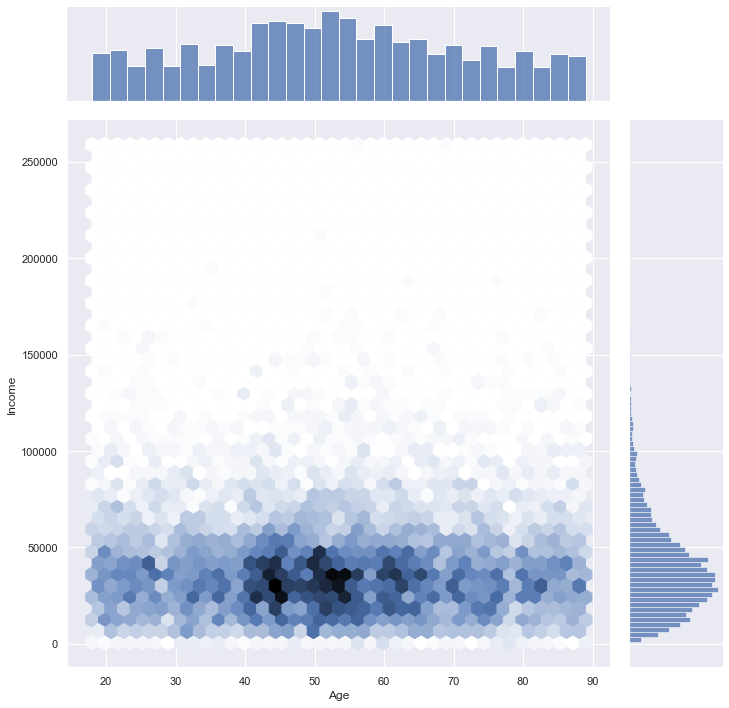

In [12]:
# Create a hexbin with marginal distributions for Age and Income
# Adapted from seaborn documentation (Waskom, 2021a):
# https://seaborn.pydata.org/examples/hexbin_marginals.html
sns.jointplot(x=data['Age'], y=data['Income'], kind='hex', height=10)

In [13]:
# Create contingency table for Area and Contract
# Adapted from Statology (Bobbitt, 2021):
# https://www.statology.org/contingency-table-python/
table = pd.crosstab(index=data['Area'], columns=data['Contract'], margins=True)
table

Contract,Month-to-month,One year,Two Year,All
Area,,,,
Rural,1807,707,813,3327
Suburban,1825,687,834,3346
Urban,1824,708,795,3327
All,5456,2102,2442,10000


<AxesSubplot:xlabel='Area', ylabel='Customers'>

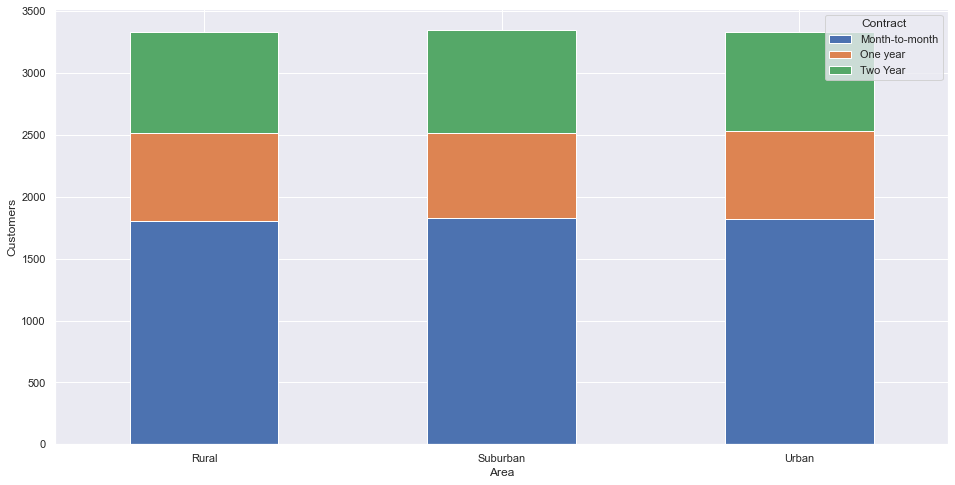

In [14]:
# Drop 'All' row and column from table before plotting
table = table.drop('All', axis=0)
table = table.drop('All', axis=1)

# Create segmented bar chart from contingency table
table.plot(kind='bar', stacked=True, rot=0, figsize=(16, 8), ylabel='Customers')

<AxesSubplot:xlabel='Contract', ylabel='Income'>

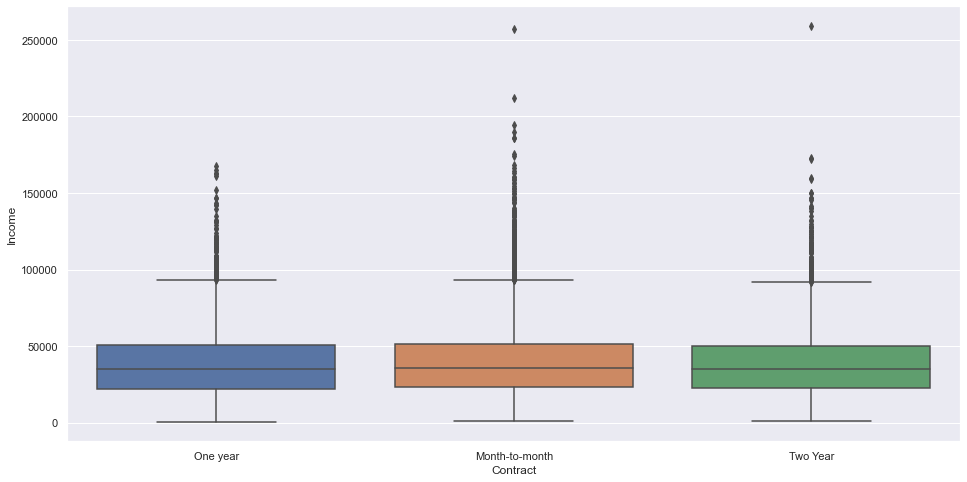

In [15]:
# Create boxplot for Area and Income
# Adapted from Practical Statistics for Data Scientists (Bruce, 2020, p. 41):
sns.boxplot(x='Contract', y='Income', data=data)

<AxesSubplot:xlabel='Contract', ylabel='Age'>

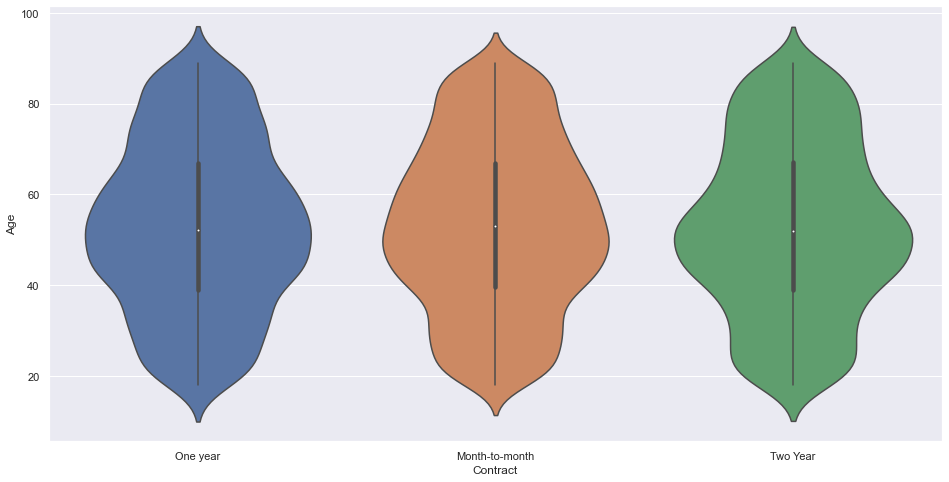

In [16]:
# Create violin plot for Age and Contract
# Adapted from Practical Statistics for Data Scientists (Bruce, 2020, p. 42)
sns.violinplot(x='Contract', y='Age', data=data)

**E. Summary**

*1. Hypothesis Test Results.*

The two-sample t-test returned a p-value of 3.28 x e-165. An extremely small p-value indicates that there is a statistically significant difference in the mean of `MonthlyCharge` between the churn and current group (Matsui, 2022). With this result, we reject the null hypothesis that x1 = x2.

*2. Limitations of Analysis*

Since the hypothesis test uses a sample of the data, the conclusion drawn from it is merely an inference to the larger dataset. Even if a result is statistically significant, that does not mean it has practice significance (Bruce, 2020, p. 109). The stakeholders should be advised to gather more information before relying solely on this test. Other analysts can also conduct additional experiments to support stakeholders in making decisions.

*3. Recommendations.*

Based on the result of the test, customers who disconnect service pays more per month than customers who stay. While it's not a guarantee that lower payment means the customers will stay, the stakeholders should think about offering more promotions to high risk customers. The company can run a campaign that lowers monthly payment for those customers and gather more data over a period of time. This will allow analysts to perform more tests and gain more insight into how cost affects churn.

**F. Panopto Recording**

Link: https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=fe3b8e4d-3d46-4d05-b63f-ae23011dd75f

**G. Third-party code**

Bobbitt, Z. (2021, March 12). How to Create a Contingency Table in Python. Statology. Retrieved 2022, from https://www.statology.org/contingency-table-python/

Narula, M. (2021, April 24). Change Seaborn Plot Size. Delft Stack. https://www.delftstack.com/howto/seaborn/size-of-seaborn-plot/

McKinney, W. (2022). pandas.DataFrame.plot.bar — pandas 1.3.5 documentation. Pandas Documentation. Retrieved 2022, from https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html

Oliphant, T. (2021). scipy.stats.probplot — SciPy v1.7.1 Manual. Scipy Documentation. Retrieved 2022, from https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html

Waskom, M. (2021a). Hexbin plot with marginal distributions — seaborn 0.11.2 documentation. Seaborn Documentation. Retrieved 2022, from https://seaborn.pydata.org/examples/hexbin_marginals.html

Waskom, M. (2021b). seaborn.histplot — seaborn 0.11.2 documentation. Seaborn. Retrieved 2022, from https://seaborn.pydata.org/generated/seaborn.histplot.html

**H. References**

Bruce, P. C., Bruce, A., & Gedeck, P. (2020). Practical Statistics for Data Scientists: 50+ Essential Concepts Using R and Python. O'Reilly.

Ford, C. (2013, July 29). A Rule of Thumb for Unequal Variances. University of Virginia Library. Retrieved 2022, from https://data.library.virginia.edu/a-rule-of-thumb-for-unequal-variances/

Hayden, L. (2022). Experimental Design in Python. DataCamp. Retrieved 2022, from https://app.datacamp.com/learn/courses/experimental-design-in-python

Kent State University Libraries. (2022, January 12). SPSS Tutorials: Chi-Square Test of Independence. Retrieved 2022, from https://libguides.library.kent.edu/spss/chisquare

Matsui, M. (2022). Introduction to Statistics in Python. DataCamp. Retrieved 2022, from https://app.datacamp.com/learn/courses/introduction-to-statistics-in-python